In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
transform = transforms.ToTensor()

In [4]:
train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 166080297.38it/s]

Extracting ../Data/MNIST/raw/train-images-idx3-ubyte.gz to ../Data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 71847979.73it/s]


Extracting ../Data/MNIST/raw/train-labels-idx1-ubyte.gz to ../Data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 39151135.02it/s]


Extracting ../Data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../Data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14929881.48it/s]


Extracting ../Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../Data/MNIST/raw



In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)

In [7]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [8]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [9]:
# 1 Color channel
# 6 Filters (output channels)
# 3by3 Kernel
# Stride = 1
conv1 = nn.Conv2d(1, 6, 3, 1) # --> 6 filters --> pooling --> conv2

# 6 Input filters conv1
# 16 filters (arbitrary choice)
# 3by3
# Stride = 1
conv2 = nn.Conv2d(6, 16, 3, 1)

In [10]:
for i, (X_train, y_train) in enumerate(train_data):
    break

In [11]:
X_train.shape

torch.Size([1, 28, 28])

In [12]:
X_train.view(1, 1, 28, 28) # ------> 4D batch (batch of 1 image)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [13]:
x = X_train.view(1, 1, 28, 28) # ------> 4D batch (batch of 1 image)

In [14]:
x = F.relu(conv1(x))

In [15]:
x.shape

torch.Size([1, 6, 26, 26])

In [16]:
x = F.max_pool2d(x, 2, 2)

In [17]:
x.shape

torch.Size([1, 6, 13, 13])

In [18]:
x = F.relu(conv2(x))

In [19]:
x.shape

torch.Size([1, 16, 11, 11])

In [20]:
x = F.max_pool2d(x, 2, 2)

In [21]:
x.shape

torch.Size([1, 16, 5, 5])

In [22]:
11 / 2

5.5

In [23]:
(((28-2) / 2) - 2) / 2

5.5

In [24]:
x.shape # 10

torch.Size([1, 16, 5, 5])

In [25]:
x.view(-1, 16*5*5).shape

torch.Size([1, 400])

In [26]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 16*5*5)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [27]:
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [28]:
for param in model.parameters():
    print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [30]:
import time
start_time = time.time()

# Variables (trackers)
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For loop for epochs
for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    # Train
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1

        y_pred = model(X_train) # Not flatten!
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum() # True / False sum()
        trn_corr += batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b%600 == 0:
            print(f"Epoch: {i} - Batch: {b} - Loss: {loss.item()}")

    train_losses.append(loss.item())
    train_correct.append(trn_corr.item())

    # Test
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            y_val = model(X_test)

            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

current_time = time.time()
total = current_time - start_time
print(f'Training took: {total/60} minutes')

Epoch: 0 - Batch: 600 - Loss: 0.04055631905794144
Epoch: 0 - Batch: 1200 - Loss: 0.08253464102745056
Epoch: 0 - Batch: 1800 - Loss: 0.36470240354537964
Epoch: 0 - Batch: 2400 - Loss: 0.01992771588265896
Epoch: 0 - Batch: 3000 - Loss: 0.0077196648344397545
Epoch: 0 - Batch: 3600 - Loss: 0.0012819472467526793
Epoch: 0 - Batch: 4200 - Loss: 0.5857292413711548
Epoch: 0 - Batch: 4800 - Loss: 0.015272838994860649
Epoch: 0 - Batch: 5400 - Loss: 0.00601040618494153
Epoch: 0 - Batch: 6000 - Loss: 0.03885171189904213
Epoch: 1 - Batch: 600 - Loss: 0.009582718834280968
Epoch: 1 - Batch: 1200 - Loss: 0.05723100155591965
Epoch: 1 - Batch: 1800 - Loss: 0.000783827155828476
Epoch: 1 - Batch: 2400 - Loss: 0.04042986035346985
Epoch: 1 - Batch: 3000 - Loss: 0.3133960962295532
Epoch: 1 - Batch: 3600 - Loss: 0.0001315607805736363
Epoch: 1 - Batch: 4200 - Loss: 0.00019000910106115043
Epoch: 1 - Batch: 4800 - Loss: 0.0009420821443200111
Epoch: 1 - Batch: 5400 - Loss: 0.001644509262405336
Epoch: 1 - Batch: 60

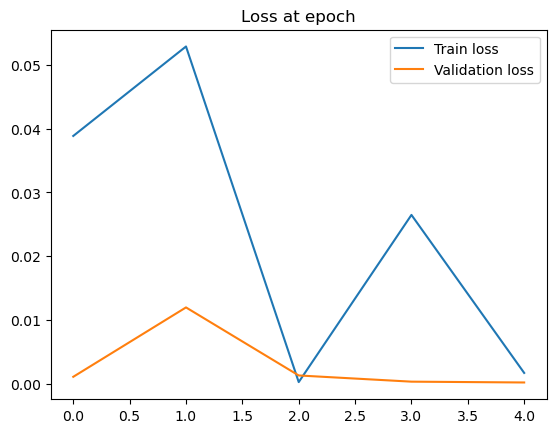

In [31]:
plt.plot(train_losses, label='Train loss')
plt.plot(test_losses, label='Validation loss')
plt.title('Loss at epoch')
plt.legend()

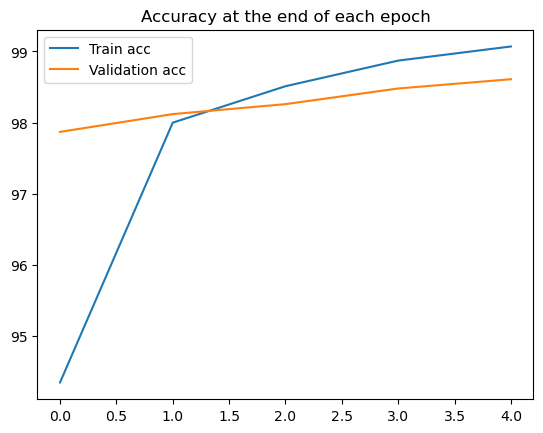

In [32]:
plt.plot([t/600 for t in train_correct], label='Train acc')
plt.plot([t/100 for t in test_correct], label='Validation acc')
plt.title('Accuracy at the end of each epoch')
plt.legend()

In [33]:
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [34]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted == y_test).sum()

In [35]:
correct.item()/len(test_data)

0.9861

In [36]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1, 10))
print()

# print the confusion matrix
confusion_matrix(predicted.view(-1), y_test.view(-1))

[[   0    1    2    3    4    5    6    7    8    9]]



array([[ 973,    0,    1,    0,    0,    2,    1,    0,    5,    0],
       [   0, 1133,    6,    1,    0,    0,    3,    7,    0,    3],
       [   2,    0, 1013,    2,    0,    0,    1,    6,    3,    1],
       [   0,    1,    0,  999,    0,    8,    0,    1,    1,    2],
       [   0,    0,    2,    0,  978,    0,    1,    1,    3,   14],
       [   0,    0,    0,    3,    0,  874,    3,    0,    0,    4],
       [   4,    1,    1,    0,    2,    3,  948,    0,    0,    0],
       [   1,    0,    8,    2,    0,    1,    0, 1008,    0,    5],
       [   0,    0,    1,    3,    0,    1,    1,    1,  961,    6],
       [   0,    0,    0,    0,    2,    3,    0,    4,    1,  974]])

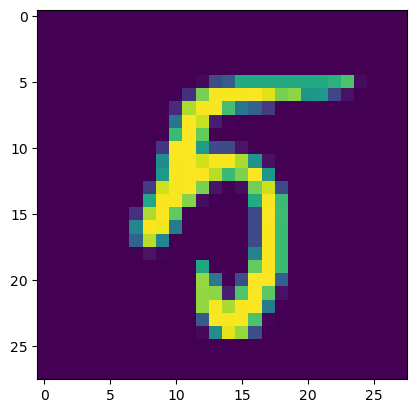

In [37]:
plt.imshow(test_data[2029][0].reshape(28, 28))

In [38]:
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[2019][0].view(1, 1, 28, 28))

In [39]:
new_prediction.argmax()

tensor(9)